<a href="https://colab.research.google.com/github/Noahbisht0/Tensorflow2-keras/blob/main/Tensorflow2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-30 11:22:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   115MB/s    in 0.6s    

2021-01-30 11:22:24 (115 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile 
local_zip = "/tmp/cats_and_dogs_filtered.zip"
zip = zipfile.ZipFile(local_zip,'r')
zip.extractall('/tmp')
zip.close()

In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
cat_fnames = os.listdir(train_cats_dir)
dog_fnames = os.listdir(train_dogs_dir)

In [ ]:
import tensorflow as tf 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation="relu"),
                                    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size =20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs = 15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 65s - loss: 0.9066 - accuracy: 0.5230 - val_loss: 0.6811 - val_accuracy: 0.5520
Epoch 2/15
100/100 - 64s - loss: 0.6934 - accuracy: 0.5560 - val_loss: 0.8025 - val_accuracy: 0.5080
Epoch 3/15
100/100 - 64s - loss: 0.6652 - accuracy: 0.6140 - val_loss: 0.6384 - val_accuracy: 0.6100
Epoch 4/15
100/100 - 63s - loss: 0.6410 - accuracy: 0.6395 - val_loss: 0.6080 - val_accuracy: 0.6630
Epoch 5/15
100/100 - 63s - loss: 0.6430 - accuracy: 0.6490 - val_loss: 0.5952 - val_accuracy: 0.6650
Epoch 6/15
100/100 - 68s - loss: 0.6183 - accuracy: 0.6580 - val_loss: 0.5745 - val_accuracy: 0.7060
Epoch 7/15
100/100 - 65s - loss: 0.6111 - accuracy: 0.6690 - val_loss: 0.5649 - val_accuracy: 0.6950
Epoch 8/15
100/100 - 64s - loss: 0.5908 - accuracy: 0.6860 - val_loss: 0.5369 - val_accuracy: 0.7120
Epoch 9/15
100/100 - 63s - loss: 0.6000 - accuracy: 0.6975 - val_loss: 0.5278 - val_accuracy: 0.7290
Epoch 10/15
100/100 - 64s - loss: 0.5826 - accuracy: 0.7060 - val_loss: 0.7795 - val_accura

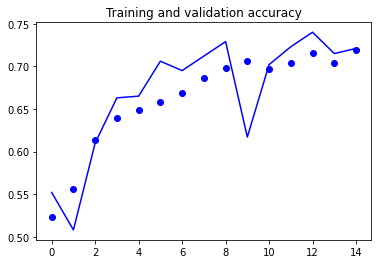

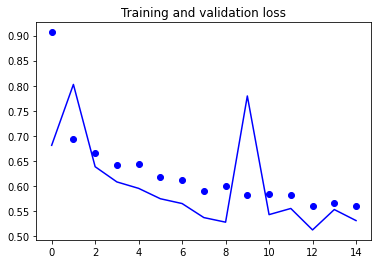

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc,'bo',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label = "validation accuracy")
plt.title("Training and validation accuracy")
plt.figure()
plt.plot(epochs,loss,'bo',label = "Training loss")
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.title("Training and validation loss")
plt.show()